In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

import collections
INF = 1 << 30
class MCMF:
  def __init__(self, n) :
    self.len = n
    self.G = [[] for _ in range(n)]
    self.C = [[0] * n for _ in range(n)]
    self.F = [[0] * n for _ in range(n)]
    self.W = [[0] * n for _ in range(n)]

  def addEdge(self, u, v, c, w) :
    self.G[u].append(v)
    self.G[v].append(u)
    self.C[u][v] = c
    self.W[u][v] = w
    self.W[v][u] = -w

  def SPFA(self, src, snk):
    mc = mf = 0
    while True :
      vis = [False] * self.len
      dist = [INF] * self.len
      par = [-1] * self.len

      Q = collections.deque([src])
      dist[src] = 0
      vis[src] = True
      while Q :
        u = Q.popleft()
        vis[u] = False
        for v in self.G[u] :
          if self.C[u][v] - self.F[u][v] > 0 and dist[v] > dist[u] + self.W[u][v] :
            dist[v] = dist[u] + self.W[u][v]
            par[v] = u
            if not vis[v] :
              vis[v] = True
              Q.append(v)
      if par[snk] == -1 : break

      flow = INF
      u = snk
      while u != src :
        flow = min(flow, self.C[par[u]][u] - self.F[par[u]][u])
        u = par[u]
      
      u = snk
      while u != src :
        mc += flow * self.W[par[u]][u]
        self.F[par[u]][u] += flow
        self.F[u][par[u]] -= flow
        u = par[u]

      mf += 1

    return mc, mf

#A = 65, F = 70
PRICE = [[10, 8, 7, 5, 1], [8, 6, 4, 3, 1], [7, 4, 3, 2, 1], [5, 3, 2, 2, 1], [1, 1, 1, 1, 0]]
def sol():
  N, M = map(int, input().split())
  G = [[*map(lambda x: 4 if x==70 else x-65, input().rstrip())] for _ in range(N)]
  V = N * M * 2 + 3
  NM = N * M
  brg, src, snk = V-3, V-2, V-1
  mcmf = MCMF(V)

  idx = lambda r, c : r*M+c

  mcmf.addEdge(src, brg, 8, 0)
  for r, l in enumerate(G) :
    for c, v in enumerate(l) : 
      mcmf.addEdge(src, idx(r,c), 1, 0)
      mcmf.addEdge(idx(r,c), NM + idx(r,c), 1, 0)
      for dr, dc in ((0, -1), (0, 1), (-1, 0), (1, 0)) :
        nr, nc = r + dr, c + dc
        if not (0 <= nr < N and 0 <= nc < M) : continue
        mcmf.addEdge(NM + idx(r,c), idx(nr, nc), 1, -PRICE[v][G[nr][nc]])

  mc, mf = mcmf.SPFA(src, snk)
  print(mc, mf)

sol()

- 몬가.. 몬가 부족함.. 

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

import collections
INF = 1 << 30
class MCMF:
  def __init__(self, n) :
    self.len = n
    self.G = [[] for _ in range(n)]
    self.C = [[0] * n for _ in range(n)]
    self.F = [[0] * n for _ in range(n)]
    self.W = [[0] * n for _ in range(n)]

  def addEdge(self, u, v, c, w) :
    self.G[u].append(v)
    self.G[v].append(u)
    self.C[u][v] = c
    self.W[u][v] = w
    self.W[v][u] = -w

  def SPFA(self, src, snk):
    mc = mf = 0
    while True :
      vis = [False] * self.len
      dist = [INF] * self.len
      par = [-1] * self.len

      Q = collections.deque([src])
      dist[src] = 0
      vis[src] = True
      while Q :
        u = Q.popleft()
        vis[u] = False
        for v in self.G[u] :
          if self.C[u][v] - self.F[u][v] > 0 and dist[v] > dist[u] + self.W[u][v] :
            dist[v] = dist[u] + self.W[u][v]
            par[v] = u
            if not vis[v] :
              vis[v] = True
              Q.append(v)
      if par[snk] == -1 : break

      flow = INF
      u = snk
      while u != src :
        flow = min(flow, self.C[par[u]][u] - self.F[par[u]][u])
        u = par[u]
      
      u = snk
      while u != src :
        mc += flow * self.W[par[u]][u]
        self.F[par[u]][u] += flow
        self.F[u][par[u]] -= flow
        u = par[u]

      mf += 1

    return mc, mf

#A = 65, F = 70
PRICE = [[10, 8, 7, 5, 1], [8, 6, 4, 3, 1], [7, 4, 3, 2, 1], [5, 3, 2, 2, 1], [1, 1, 1, 1, 0]]
def sol():
  N, M = map(int, input().split())
  G = [[*map(lambda x: 4 if x==70 else x-65, input().rstrip())] for _ in range(N)]
  V = N * M + 2
  src, snk = V-2, V-1
  mcmf = MCMF(V)

  idx = lambda r, c : r*M+c
  for r, l in enumerate(G) :
    for c, v in enumerate(l) : 
      if (r + c) % 2 : continue # 체크문양으로 자르기
      mcmf.addEdge(src, idx(r, c), 1, 0)
      mcmf.addEdge(idx(r, c), snk, 1, 0) #자르지 않고 그대로 두는 경우 = 최대 유량을 고정시키는 테크닉
      for dr, dc in ((0, -1), (0, 1), (-1, 0), (1, 0)) :
        nr, nc = r + dr, c + dc
        if not (0 <= nr < N and 0 <= nc < M) : continue
        mcmf.addEdge(idx(r, c), idx(nr, nc), 1, -PRICE[v][G[nr][nc]]) #두부 모판을 자르는 경우 그에 맞는 비용을 더해준다.
        mcmf.addEdge(idx(nr, nc), snk, 1, 0)

  mc, mf = mcmf.SPFA(src, snk)
  print(-mc)

sol()

### 풀이
- 우선 두부를 자르는 모양을 생각할 때 `N * M`으로 모델링 하는 것 까진 좋으나, 체크무늬로 정점을 분할할 생각을 했어야 했다.
- 1657(두부장수 장홍준) 때처럼 두부를 자르지 않아야 최적해가 나오는 방법을 찾는 테크닉이 필요했다.
  - 그것은 바로 자르지 않을 무늬에 비용 0짜리 간선을 sink로 흘려보내는 것이다.\
  이를 통해 최대 유량을 고정시킨채로 최소비용만 찾을 수 있게 된다.
  - 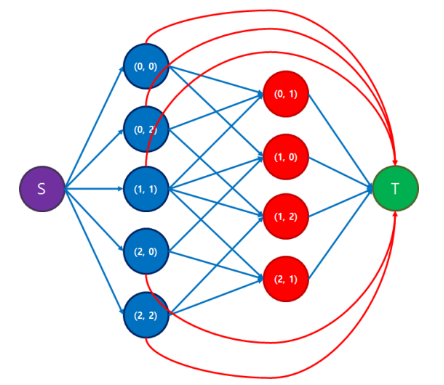